<a id='TOC'/>

### Table of Content (TOC)
1. [Load packages](#loading_packages)
2. [Load data](#data_loading)
3. [EDA and data cleaning](#EDA_cleaning)

<a id='loading_packages'/>

### Loading packages
[back to TOC](#TOC)

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 150)


import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

<a id='data_loading'/>

### Loading data
[back to TOC](#TOC)

In [2]:
df = pd.read_csv('data/data.csv', encoding="ISO-8859-1", dtype={'CustomerID': str})

<a id='EDA_cleaning'/>

### EDA and data cleaning
[back to TOC](#TOC)

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317742,564817,22077,6 RIBBONS RUSTIC CHARM,4,2011-08-30 12:02:00,3.29,NaN,United Kingdom
397601,571190,21807,WHITE CHRISTMAS STAR DECORATION,1,2011-10-14 11:43:00,0.42,17771,United Kingdom
237108,557801,23031,DRAWER KNOB CRACKLE GLAZE PINK,6,2011-06-23 10:14:00,1.65,13319,United Kingdom
18599,537823,21058,PARTY INVITES WOODLAND,1,2010-12-08 14:25:00,1.66,NaN,United Kingdom
537637,581334,20724,RED RETROSPOT CHARLOTTE BAG,6,2011-12-08 12:07:00,0.85,17841,United Kingdom
189885,553172,23052,RECYCLED ACAPULCO MAT TURQUOISE,4,2011-05-13 17:15:00,8.25,14031,United Kingdom
287418,562102,23111,PARISIENNE SEWING BOX,4,2011-08-02 14:21:00,12.50,13089,United Kingdom
57383,541205,21745,GAOLERS KEYS DECORATIVE GARDEN,2,2011-01-14 12:23:00,3.75,18106,United Kingdom
297771,562955,21363,HOME SMALL WOOD LETTERS,1,2011-08-11 10:14:00,10.79,NaN,United Kingdom
137205,548148,84510E,SET OF 4 GREEN CAROUSEL COASTERS,1,2011-03-29 12:31:00,1.25,17931,United Kingdom


### Duplicates:

In [7]:
df = df.drop(df[df.duplicated(keep=False)].index, axis=0)

The next step of data cleaning is related to differences in spelling or formatting in the descriptions, especially created by redundant whitespaces. The following item is written either with one space between "PINK" and "POLKADOT" or with two. However, both variants are associated with the same `StockCode`,  

In [8]:
print(df.query("Description=='PINK POLKADOT PLATE'"))

print(df.query("Description=='PINK POLKADOT PLATE '")[['Description', 'StockCode']])
print('=====================================================')
print(df.query("Description=='PINK  POLKADOT PLATE '")[['Description', 'StockCode']])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
                 Description StockCode
446563  PINK POLKADOT PLATE      21243
451341  PINK POLKADOT PLATE      21243
454412  PINK POLKADOT PLATE      21243
457809  PINK POLKADOT PLATE      21243
458560  PINK POLKADOT PLATE      21243
460226  PINK POLKADOT PLATE      21243
463249  PINK POLKADOT PLATE      21243
464591  PINK POLKADOT PLATE      21243
466240  PINK POLKADOT PLATE      21243
472803  PINK POLKADOT PLATE      21243
479199  PINK POLKADOT PLATE      21243
482488  PINK POLKADOT PLATE      21243
485378  PINK POLKADOT PLATE      21243
486635  PINK POLKADOT PLATE      21243
488615  PINK POLKADOT PLATE      21243
489293  PINK POLKADOT PLATE      21243
492650  PINK POLKADOT PLATE      21243
509429  PINK POLKADOT PLATE      21243
519165  PINK POLKADOT PLATE      21243
523682  PINK POLKADOT PLATE      21243
524417  PINK POLKADOT PLATE      21243
529783  PINK POL

In [9]:
#create a Series with all unique values of `Description`
unique_descriptions = pd.DataFrame(df['Description'].unique())[0]

#removing all redundant spaces (trailing spaces and doublespaces) from the Series with unique descriptions
unique_descriptions_without_doublespaces = pd.DataFrame(unique_descriptions.str.strip().replace(r'\s+', ' ', regex=True))[0]

#after stripping the descriptions of the redundant spaces, they not so unique anymore
print(f"There are now {unique_descriptions_without_doublespaces.duplicated().sum()} unique `Description` values again in the dataset")

There are now 20 unique `Description` values again in the dataset


Some descriptions also contain commas while others don't

In [10]:
df.dropna()[df.dropna()['Description'].str.contains('^(?=.*SWISS)(?=.*ROLL)(?=.*TOWEL)(?=.*PINK)(?=.*SPOTS)')]['Description'].value_counts()

Description
SWISS ROLL TOWEL PINK  SPOTS     27
SWISS ROLL TOWEL, PINK  SPOTS    19
Name: count, dtype: int64

In [11]:
# remove commas from descriptions
df['Description'] = df['Description'].str.replace(r',', ' ', regex=True)

# remove redundant spaces from descriptions
df['Description'] = df['Description'].str.strip().replace(r'\s+', ' ', regex=True)

In [12]:
df.duplicated(keep=False).sum()

0

The corrections have not introduced any new duplicates.

### Null-values:

In [13]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134995
Country             0
dtype: int64

In [14]:
df[df['Description'].isna()].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416901,572564,40016,NaN,-108,2011-10-25 09:56:00,0.0,NaN,United Kingdom
201740,554313,21144,NaN,-63,2011-05-23 15:28:00,0.0,NaN,United Kingdom
73935,542396,22146,NaN,-4,2011-01-27 15:12:00,0.0,NaN,United Kingdom
216129,555821,21399,NaN,-116,2011-06-07 12:01:00,0.0,NaN,United Kingdom
137905,548173,85067,NaN,-3,2011-03-29 14:17:00,0.0,NaN,United Kingdom
22295,538160,20956,NaN,288,2010-12-09 17:18:00,0.0,NaN,United Kingdom
415115,572514,20774,NaN,-4,2011-10-24 14:36:00,0.0,NaN,United Kingdom
500161,578738,21638,NaN,-33,2011-11-25 11:33:00,0.0,NaN,United Kingdom
283806,561805,23284,NaN,-15,2011-07-29 14:42:00,0.0,NaN,United Kingdom
220143,556124,17007B,NaN,-4,2011-06-09 10:14:00,0.0,NaN,United Kingdom


In [15]:
df[df['Description'].isna()].isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1454
Country           0
dtype: int64

In [16]:
df[df['Description'].isna()]['UnitPrice'].unique()

array([0.])

(-200.0, 200.0)

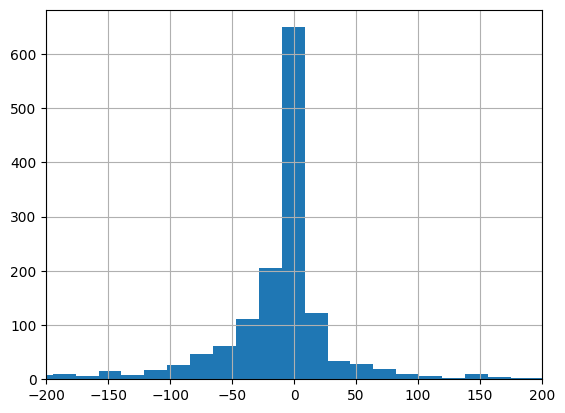

In [17]:
ax = df[df['Description'].isna()]['Quantity'].hist(bins=500)
ax.set_xlim(xmin=-200, xmax=200)


In 1454 cases, the `Description` and `CustomerID` values are NaN, while the `UnitPrice` is always 0.0. The `Quantity` value however ranges from high negative to high positive values.  All this could indicate undisclosed movements of stock items between warehouses. In short, these are no sales and can be **quickly disregarded** for the purpose of the task at hand.

A deeper analysis by comparing the above distribution to the distribution of actual sales by means of a **variance analysis** would give us more certainty.

In [18]:
df = df.drop(df[df['Description'].isna()].index, axis=0)

Speaking of `UnitPrice` values:

In [19]:
df.query("UnitPrice <0")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


These have nothing to do with the customers and can be dropped.

In [20]:
df = df.drop(df.query("UnitPrice <0").index, axis=0)

Then there are also transactions with `UnitPrice`=0:

In [21]:
df.query("UnitPrice ==0").head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom
14335,537534,85064,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
14336,537534,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
14337,537534,84692,BOX OF 24 COCKTAIL PARASOLS,2,2010-12-07 11:48:00,0.0,NaN,United Kingdom


Some of them have a `CustomerID` value but others don't:

In [22]:
df.query("UnitPrice ==0")['CustomerID'].isna().value_counts()

CustomerID
True     1011
False      40
Name: count, dtype: int64

The question remains, how transactions with `UnitPrice`=0 actually represent the sentiment of a customer towards the product? Where the products gifted or rabated?

In [23]:
df.query("Description == 'JUMBO BAG SPACEBOY DESIGN' & CustomerID == '12431'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
379992,569722,22385,JUMBO BAG SPACEBOY DESIGN,20,2011-10-06 09:31:00,2.08,12431,Australia
439361,574469,22385,JUMBO BAG SPACEBOY DESIGN,12,2011-11-04 11:55:00,0.00,12431,Australia


This one coud have been given to the customer for free as a rabate: "_if you buy 20, you get 12 free on your next order_".
It would be difficult to determine whether that was the case or the `UnitPrice` was just not properly recorded. 

In [24]:
df.query("Description == 'BISCUIT TIN VINTAGE CHRISTMAS' & CustomerID == '12415'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
304967,563614,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,2011-08-18 08:51:00,2.49,12415,Australia
436428,574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,2011-11-03 11:26:00,0.00,12415,Australia


One customer bought 216 Buiscuit Tins for a total price of 537.84$. At the next order, the same amount of the same item was for free?


In [25]:
df.query("Description == 'MINI LIGHTS WOODLAND MUSHROOMS' & CustomerID == '13985'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
424657,573276,23480,MINI LIGHTS WOODLAND MUSHROOMS,8,2011-10-28 13:14:00,3.75,13985,United Kingdom
446781,574920,23480,MINI LIGHTS WOODLAND MUSHROOMS,4,2011-11-07 16:34:00,3.75,13985,United Kingdom
446794,574920,23480,MINI LIGHTS WOODLAND MUSHROOMS,1,2011-11-07 16:34:00,0.00,13985,United Kingdom


This could be a rabate. 

It is not clear how the transactions with `UnitPrice`=0 come to be. Perhaps there are certain (or hidden) rules that explain these prices. 

As those free sales often (but not always) follow previous sales of the same items but for higher prices, I assume that they still reflect the customers preferences and can be used for the recommendation engine.

We see again and again, that there are many missing `CustomerID` numbers. For a recommendation however, it is quite important to be able to associate sales with certain customers. We are also missing information that could help us impute and distinguish between the unsigned customers. Ist is clear, for instance, that the same `InvoiceNo` refers to one single customer. However, it is not clear which other invoice numbers refer to the same customer. Perhaps it could be possible to distinguish between these customers by clustering. However, more data would probably by necessary for that: more detailed location data (ZIP numbers or IP numbers e.g.).  

As this is not the scope of the current task, I will for now delete the rows that belong to the unknown customers. 

In [26]:
df = df.drop(df[df['CustomerID'].isna()].index, axis=0)

In [27]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Sales vs. returns

The next point that needs to be addressed are negativ `Quantity` values.

In [28]:
df.query("Quantity<=0").sample(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
197426,C553906,22342,HOME GARLAND PAINTED ZINC,-12,2011-05-19 18:13:00,1.65,16554,United Kingdom
21749,C538119,22865,HAND WARMER OWL DESIGN,-1,2010-12-09 15:34:00,2.10,13136,United Kingdom
144834,C548834,M,Manual,-1,2011-04-04 13:09:00,2053.07,12744,Singapore
516392,C579894,23012,GLASS APOTHECARY BOTTLE PERFUME,-1,2011-12-01 08:26:00,3.95,13098,United Kingdom


In [29]:
df['Cancelled'] = (
    df['InvoiceNo']
    .str.extract('([a-zA-Z]+)')
    .rename(columns={0:'Cancelled'})
    .fillna(0)
    .replace({'C': 1})
    .astype(int))


In [30]:
df.query("Quantity<=0 & Cancelled==0").count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Cancelled      0
dtype: int64

All cases with `Quantity` < 0 are cancelled transactions.

In [31]:
print(f"{round(df['Cancelled'].value_counts()[1]/df['Cancelled'].value_counts()[0]*100,1)}% of all transactions are canceled gain.")

2.3% of all transactions are canceled gain.


In [32]:
df[df['StockCode'].str.isalpha()]['StockCode'].unique()

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [33]:
df.query("StockCode=='PADS'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,0
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom,0
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133,United Kingdom,0
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom,0


In [34]:
filter_ = df[df['StockCode'].str.isalpha()]['StockCode'].index

df = df.drop(filter_,axis=0)           

In [35]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity']   > 0)].copy()

    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)

    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        

    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break         

In [36]:
df_cleaned.query("Quantity<=0")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,QuantityCanceled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,1,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,1,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,1,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,1,0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,1,0
...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom,1,0
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,1,0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,1,0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,1,0


In [37]:
df_backup = df_cleaned.copy()

In [38]:
df.query("Description=='RED RETROSPOT CAKE STAND' & CustomerID=='14299'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
18246,C537812,21843,RED RETROSPOT CAKE STAND,-10,2010-12-08 13:33:00,9.95,14299,United Kingdom,1
19822,537895,21843,RED RETROSPOT CAKE STAND,24,2010-12-09 10:30:00,9.95,14299,United Kingdom,0
38935,C539598,21843,RED RETROSPOT CAKE STAND,-11,2010-12-20 13:54:00,9.95,14299,United Kingdom,1
45949,540345,21843,RED RETROSPOT CAKE STAND,8,2011-01-06 13:19:00,10.95,14299,United Kingdom,0
52398,C540780,21843,RED RETROSPOT CAKE STAND,-4,2011-01-11 11:19:00,10.95,14299,United Kingdom,1


In [39]:
df_cleaned.query("Description=='RED RETROSPOT CAKE STAND' & CustomerID=='14299'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,QuantityCanceled
18246,C537812,21843,RED RETROSPOT CAKE STAND,-10,2010-12-08 13:33:00,9.95,14299,United Kingdom,1,0
19822,537895,21843,RED RETROSPOT CAKE STAND,24,2010-12-09 10:30:00,9.95,14299,United Kingdom,0,11
38935,C539598,21843,RED RETROSPOT CAKE STAND,-11,2010-12-20 13:54:00,9.95,14299,United Kingdom,1,0
45949,540345,21843,RED RETROSPOT CAKE STAND,8,2011-01-06 13:19:00,10.95,14299,United Kingdom,0,4
52398,C540780,21843,RED RETROSPOT CAKE STAND,-4,2011-01-11 11:19:00,10.95,14299,United Kingdom,1,0


In [40]:
df_cleaned['Quantity']=df_cleaned['Quantity']-df_cleaned['QuantityCanceled']

In [41]:
[df_cleaned['Quantity']<0]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 541904    False
 541905    False
 541906    False
 541907    False
 541908    False
 Name: Quantity, Length: 394999, dtype: bool]

In [42]:
df_cleaned = df_cleaned.drop(df_cleaned.query("Quantity<0").index, axis=0)

In [43]:
df_cleaned = df_cleaned.drop(['QuantityCanceled', 'Cancelled'], axis=1)

In [44]:
df_cleaned.to_pickle("data/data_cleaned.pkl")  